In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
data = {'A': [15280, 1350, 79, 393, 161, 870, 165], 
'B': [20000, 1588, 85, 468, 177, 1110, 160],
'C': [14800, 1294, 68, 424, 168, 1050, 152], 
'D': [14100, 1222, 59, 412, 161, 930, 151], 
'E' :[17450, 1585, 98, 439, 164, 1105, 165], 
'F': [17740, 1297, 82, 429, 169, 1080, 160],
'G': [16150, 1796, 79, 449, 169, 1160, 154],
'H' :[16000, 1565, 55, 424, 163, 1010, 140],
'I': [23800, 2664, 128, 452, 173, 1320, 180],
'J': [13270, 1166, 55, 399, 157, 815, 140],
'K': [21200, 1570, 109, 428, 162, 1060, 175],
'L': [17000, 1798, 82, 445, 172, 1160, 158],
'M' :[22000, 1998, 115, 469, 169, 1370, 160],
'N' :[17500, 1993, 98, 438, 170, 1080, 167],
'O' : [19700, 1442, 80, 431, 166, 1129, 144],
'P':[14000, 1769, 83, 440, 165, 1095, 165],
'Q' :[16350, 1979, 100, 459, 173, 1120, 173],
'R':[11050, 1294, 68, 404, 161, 955, 140]}

In [5]:
car_data = pd.DataFrame.from_dict(data, orient='index',
                       columns=['prix (€)','cylindrée' ,'puissance', 'longueur', 'largeur', 'poids', 'vitesse'])
car_data

,prix (€),cylindrée,puissance,longueur,largeur,poids,vitesse
A,15280,1350,79,393,161,870,165
B,20000,1588,85,468,177,1110,160
C,14800,1294,68,424,168,1050,152
D,14100,1222,59,412,161,930,151
E,17450,1585,98,439,164,1105,165
F,17740,1297,82,429,169,1080,160
G,16150,1796,79,449,169,1160,154
H,16000,1565,55,424,163,1010,140
I,23800,2664,128,452,173,1320,180
J,13270,1166,55,399,157,815,140


In [6]:
car_data.describe()

,prix (€),cylindrée,puissance,longueur,largeur,poids,vitesse
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,17077.222222,1631.666667,84.611111,433.500000,166.666667,1078.833333,158.277778
std,3278.553852,373.929846,20.376281,22.107358,5.313689,136.957808,12.140383
min,11050.000000,1166.000000,55.000000,393.000000,157.000000,815.000000,140.000000
25%,14920.000000,1310.250000,70.750000,424.000000,162.250000,1020.000000,151.250000
50%,16675.000000,1577.500000,82.000000,434.500000,167.000000,1087.500000,160.000000
75%,19210.000000,1797.500000,98.000000,448.000000,169.750000,1126.750000,165.000000
max,23800.000000,2664.000000,128.000000,469.000000,177.000000,1370.000000,180.000000


Correlation matrix

In [7]:
correlation_matrix = car_data.corr()
correlation_matrix

,prix (€),cylindrée,puissance,longueur,largeur,poids,vitesse
prix (€),1.000000,0.638741,0.799424,0.645787,0.547383,0.754391,0.582715
cylindrée,0.638741,1.000000,0.796628,0.701462,0.629757,0.788952,0.664934
puissance,0.799424,0.796628,1.000000,0.641362,0.520832,0.765293,0.844379
longueur,0.645787,0.701462,0.641362,1.000000,0.849266,0.868090,0.475928
largeur,0.547383,0.629757,0.520832,0.849266,1.000000,0.716874,0.472945
poids,0.754391,0.788952,0.765293,0.868090,0.716874,1.000000,0.477596
vitesse,0.582715,0.664934,0.844379,0.475928,0.472945,0.477596,1.000000


Covariance matrix

In [8]:
covariance_matrix = car_data.cov()
covariance_matrix

,prix (€),cylindrée,puissance,longueur,largeur,poids,vitesse
prix (€),1.074892e+07,783063.725490,53405.326797,46806.764706,9536.078431,338739.509804,23193.758170
cylindrée,7.830637e+05,139823.529412,6069.745098,5798.705882,1251.294118,40404.294118,3018.568627
puissance,5.340533e+04,6069.745098,415.192810,288.911765,56.392157,2135.696078,208.879085
longueur,4.680676e+04,5798.705882,288.911765,488.735294,99.764706,2628.382353,127.735294
largeur,9.536078e+03,1251.294118,56.392157,99.764706,28.235294,521.705882,30.509804
poids,3.387395e+05,40404.294118,2135.696078,2628.382353,521.705882,18757.441176,794.107843
vitesse,2.319376e+04,3018.568627,208.879085,127.735294,30.509804,794.107843,147.388889


EigenValues/EigenVectors (valeurs propres et vecteurs propres)

In [9]:
eigenValues, eigenVectors = np.linalg.eig(correlation_matrix)

In [10]:
eigenValues

array([5.07154831, 0.86706293, 0.45356743, 0.3230646 , 0.1618419 ,
       0.08168246, 0.04123236])

In [11]:
eigenVectors

array([[ 0.37139909,  0.13637337, -0.63955335, -0.45571699,  0.41120547,
         0.22012275, -0.09599267],
       [ 0.39069438,  0.08530276,  0.13641121,  0.71563196,  0.50471877,
         0.23262858,  0.02207073],
       [ 0.40061777,  0.40124396, -0.10284699,  0.03483332, -0.28279313,
        -0.31931066,  0.69626616],
       [ 0.38789605, -0.43408778,  0.07903133, -0.06263196, -0.46274003,
         0.64387309,  0.14911353],
       [ 0.35235515, -0.47879798,  0.45177276, -0.36537076,  0.3764223 ,
        -0.3865266 ,  0.13381835],
       [ 0.40370152, -0.24861287, -0.32279884,  0.27943177, -0.34005812,
        -0.47145551, -0.50500068],
       [ 0.3336669 ,  0.57761662,  0.49723467, -0.25195016, -0.15727512,
         0.0960466 , -0.45863257]])

EigenValues's table:variances of new features (principle components)

In [12]:
val_propres = pd.DataFrame(eigenValues, index = ['F1','F2','F3','F4','F5','F6','F7'], columns = ['val_propres'])

val_propres['var_percent'] = (val_propres['val_propres'] / val_propres['val_propres'].sum()) * 100

val_propres['cum_var_percent'] = val_propres['var_percent'].cumsum()

val_propres

,val_propres,var_percent,cum_var_percent
F1,5.071548,72.450690,72.450690
F2,0.867063,12.386613,84.837303
F3,0.453567,6.479535,91.316838
F4,0.323065,4.615209,95.932047
F5,0.161842,2.312027,98.244074
F6,0.081682,1.166892,99.410966
F7,0.041232,0.589034,100.000000


EigenVectors's table:new axes

In [13]:
vect_propres = pd.DataFrame(eigenVectors, columns = ['F1','F2','F3','F4','F5','F6','F7'], 
                            index =['prix (€)','cylindrée' ,'puissance', 'longueur', 'largeur', 'poids', 'vitesse'])
vect_propres

,F1,F2,F3,F4,F5,F6,F7
prix (€),0.371399,0.136373,-0.639553,-0.455717,0.411205,0.220123,-0.095993
cylindrée,0.390694,0.085303,0.136411,0.715632,0.504719,0.232629,0.022071
puissance,0.400618,0.401244,-0.102847,0.034833,-0.282793,-0.319311,0.696266
longueur,0.387896,-0.434088,0.079031,-0.062632,-0.462740,0.643873,0.149114
largeur,0.352355,-0.478798,0.451773,-0.365371,0.376422,-0.386527,0.133818
poids,0.403702,-0.248613,-0.322799,0.279432,-0.340058,-0.471456,-0.505001
vitesse,0.333667,0.577617,0.497235,-0.251950,-0.157275,0.096047,-0.458633


Les trois premières colonnes de ce tableau permettent, tout d’abord, de réaliser le graphique des variables, elles permettent également de donner une signification aux facteurs (donc aux axes des graphiques).
On notera que le reste des colonnes ne sera pas utilisé puisqu’on ne retient que trois dimensions, ceci en se basant sur le pourcentage de la variance cumulée.


# Principle Components analysis with sklearn

In [14]:
#Normalize the data
norm_data = pd.DataFrame(StandardScaler().fit_transform(car_data), columns = car_data.columns, index = car_data.index)
norm_data

,prix (€),cylindrée,puissance,longueur,largeur,poids,vitesse
A,-0.564068,-0.775099,-0.283358,-1.885081,-1.097345,-1.569007,0.569760
B,0.917329,-0.120163,0.019639,1.605810,2.001041,0.234161,0.145972
C,-0.714718,-0.929201,-0.838852,-0.442179,0.258199,-0.216631,-0.532090
D,-0.934417,-1.127333,-1.293348,-1.000722,-1.097345,-1.118215,-0.616848
E,0.116998,-0.128419,0.676132,0.255999,-0.516398,0.196595,0.569760
F,0.208016,-0.920946,-0.131860,-0.209453,0.451848,0.008765,0.145972
G,-0.291014,0.452217,-0.283358,0.721451,0.451848,0.609821,-0.362575
H,-0.338092,-0.183455,-1.495346,-0.442179,-0.710047,-0.517159,-1.549183
I,2.109979,2.840806,2.191116,0.861086,1.226445,1.811934,1.841127
J,-1.194917,-1.281436,-1.495346,-1.605810,-1.871942,-1.982233,-1.549183


In [15]:
#Apply PCA
pca = PCA()
principal_comp_ = pca.fit_transform(norm_data)

In [16]:
#EigenValues
v_pr = pca.explained_variance_
# % of variance for each component
var_ratio = pca.explained_variance_ratio_


EigenValues's table

In [18]:
val_propres_pca = pd.DataFrame(v_pr, index =['F1','F2','F3','F4','F5','F6','F7'], columns =['val_propres'])
val_propres_pca['var_ratio'] = var_ratio
val_propres_pca['cum_var_ratio'] = val_propres_pca['var_ratio'].cumsum()
val_propres_pca

,val_propres,var_ratio,cum_var_ratio
F1,5.369875,0.724507,0.724507
F2,0.918067,0.123866,0.848373
F3,0.480248,0.064795,0.913168
F4,0.342068,0.046152,0.959320
F5,0.171362,0.023120,0.982441
F6,0.086487,0.011669,0.994110
F7,0.043658,0.005890,1.000000


Principal axes(eigen vectors)

In [19]:
# pca.components_ : returns EigenVectors
pc_df = pd.DataFrame(abs(pca.components_[:3]), columns = car_data.columns, index =['F1','F2','F3'])
pc_df

,prix (€),cylindrée,puissance,longueur,largeur,poids,vitesse
F1,0.371399,0.390694,0.400618,0.387896,0.352355,0.403702,0.333667
F2,0.136373,0.085303,0.401244,0.434088,0.478798,0.248613,0.577617
F3,0.639553,0.136411,0.102847,0.079031,0.451773,0.322799,0.497235


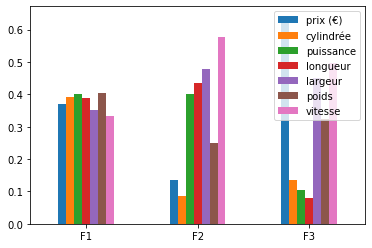

In [20]:
pc_df.plot.bar(rot=0)

In [21]:
#new data coordinates according to the new components (new features)

#"principal_comp_" is the output of "pca.fit_transform"
principal_comp = pd.DataFrame(principal_comp_, index = car_data.index, columns = ['F1','F2','F3','F4','F5','F6','F7'])
principal_comp

,F1,F2,F3,F4,F5,F6,F7
A,-2.187010,1.806138,0.429209,0.370478,0.360159,0.209154,-0.057151
B,1.772817,-1.506328,0.422828,1.306394,0.218587,-0.331806,0.244990
C,-1.310076,-0.698484,0.303676,0.361594,-0.066502,0.439112,-0.213916
D,-2.737701,0.138967,0.056247,0.119412,-0.060192,-0.192801,-0.284158
E,0.450973,0.692646,-0.155101,0.037640,-0.677218,-0.106454,0.065180
F,-0.205167,-0.146386,0.012228,0.944750,-0.100922,0.425970,-0.174244
G,0.519344,-1.005362,0.160964,-0.497847,-0.125401,-0.099163,-0.133005
H,-1.943701,-0.896102,-0.614101,-0.503631,0.548103,-0.445149,-0.202034
I,4.883291,1.061235,-0.234567,-0.688143,0.839287,0.171375,-0.081152
J,-4.143120,0.319056,-0.359844,-0.196366,0.240906,-0.391711,0.266849


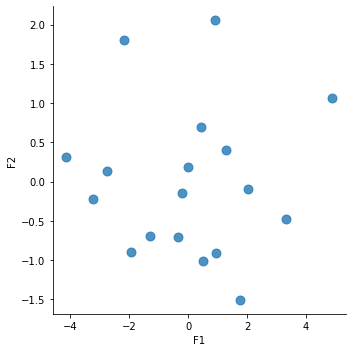

In [22]:
#Data projections according to the new components (axes)(F1,F2)
#2D
sns.lmplot( x="F1", y="F2",
  data=principal_comp, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

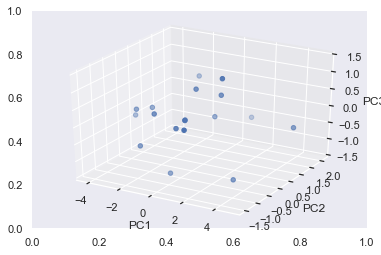

In [23]:
#Data projections according to the new components (axes)(F1,F2,F3)
#3D
sns.set(style = "darkgrid")

fig, ax_1 = plt.subplots(1, 1)
ax_1 = fig.add_subplot(111, projection = '3d')

x = principal_comp["F1"]
y = principal_comp["F2"]
z = principal_comp["F3"]

ax_1.set_xlabel("PC1")
ax_1.set_ylabel("PC2")
ax_1.set_zlabel("PC3")

ax_1.scatter(x, y, z)


plt.show()